# Week 1 - Exploratory analysis

In [338]:
#Load necessary packages
import pandas as pd
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import numpy as np

import random

In [101]:
#Load data
os.chdir("//Users/Olga/Documents/INSIGHT2019/Library data/AllPldData")
Files_in_folder = os.listdir()
File_names = ['_2014', '_2015', '_2016', '_2001', '_2002', '_2003', 
              '_2004','_2005', '_2006', '_2007', '_2008', '_2009', 
              '_2010', '_2011', '_2012', '_2013', '_2000', '_1992', 
              '_1993', '_1994', '_1995', '_1996', '_1997', '_1998', '_1999']
Files = []

for filename in os.listdir():
    Files.append(pd.read_csv(filename, encoding = 'latin-1', low_memory = False))

In [107]:
#create dictionary of libraries labeled by year
LibData_dict = {}
for i in range(0, len(File_names)):
    LibData_dict[File_names[i]] = Files[i]
    
for k, v in LibData_dict.items():
    print(k, v.shape, type(LibData_dict[k]))

_2014 (9305, 159) <class 'pandas.core.frame.DataFrame'>
_2015 (9251, 159) <class 'pandas.core.frame.DataFrame'>
_2016 (9252, 151) <class 'pandas.core.frame.DataFrame'>
_2001 (9133, 108) <class 'pandas.core.frame.DataFrame'>
_2002 (9141, 107) <class 'pandas.core.frame.DataFrame'>
_2003 (9214, 110) <class 'pandas.core.frame.DataFrame'>
_2004 (9210, 128) <class 'pandas.core.frame.DataFrame'>
_2005 (9201, 131) <class 'pandas.core.frame.DataFrame'>
_2006 (9211, 139) <class 'pandas.core.frame.DataFrame'>
_2007 (9217, 148) <class 'pandas.core.frame.DataFrame'>
_2008 (9284, 150) <class 'pandas.core.frame.DataFrame'>
_2009 (9299, 152) <class 'pandas.core.frame.DataFrame'>
_2010 (9308, 154) <class 'pandas.core.frame.DataFrame'>
_2011 (9315, 157) <class 'pandas.core.frame.DataFrame'>
_2012 (9305, 155) <class 'pandas.core.frame.DataFrame'>
_2013 (9309, 157) <class 'pandas.core.frame.DataFrame'>
_2000 (9078, 108) <class 'pandas.core.frame.DataFrame'>
_1992 (8944, 83) <class 'pandas.core.frame.DataF

In [132]:
#convince myself that FSCSKEY is unique for each library.
for k, v in LibData_dict.items():
    print(len(LibData_dict[k]['FSCSKEY'].unique()))
    print(LibData_dict[k].shape[0])
    print(len(LibData_dict[k]['FSCSKEY'].unique()) == LibData_dict[k].shape[0])

9305
9305
True
9251
9251
True
9252
9252
True
9133
9133
True
9141
9141
True
9214
9214
True
9210
9210
True
9201
9201
True
9211
9211
True
9217
9217
True
9284
9284
True
9299
9299
True
9308
9308
True
9315
9315
True
9305
9305
True
9309
9309
True
9078
9078
True
8944
8944
True
8929
8929
True
8920
8920
True
8981
8981
True
8946
8946
True
8968
8968
True
8966
8966
True
9048
9048
True


In [218]:
#Merge on FSKEY
mylist = [LibData_dict['_1992'], LibData_dict['_1993'], LibData_dict['_1994'], 
         LibData_dict['_1995'], LibData_dict['_1996'], LibData_dict['_1997'], 
        LibData_dict['_1998'], LibData_dict['_1999'], LibData_dict['_2000'],
        LibData_dict['_2001'], LibData_dict['_2002'], LibData_dict['_2003'],
        LibData_dict['_2004'], LibData_dict['_2005'], LibData_dict['_2006'],
        LibData_dict['_2007'], LibData_dict['_2008'], LibData_dict['_2009'],
        LibData_dict['_2010'], LibData_dict['_2011'], LibData_dict['_2012'],
        LibData_dict['_2013'], LibData_dict['_2014'], LibData_dict['_2015'], LibData_dict['_2016']]

for i in range(len(mylist)):
    if i == 0:
        MergedLibData = mylist[i]
    else:
        MergedLibData = pd.merge(
            MergedLibData,
            mylist[i],
            how = 'outer',
            on = 'FSCSKEY'
        )

In [149]:
print("Shape of resulting merged df: ", MergedLibData.shape)

Shape of resulting merged df:  (10158, 3082)


In [147]:
#Get number of unique libraries over all the years.
mylist = [LibData_dict['_1992'], LibData_dict['_1993'], LibData_dict['_1994'], 
         LibData_dict['_1995'], LibData_dict['_1996'], LibData_dict['_1997'], 
        LibData_dict['_1998'], LibData_dict['_1999'], LibData_dict['_2000'],
        LibData_dict['_2001'], LibData_dict['_2002'], LibData_dict['_2003'],
        LibData_dict['_2004'], LibData_dict['_2005'], LibData_dict['_2006'],
        LibData_dict['_2007'], LibData_dict['_2008'], LibData_dict['_2009'],
        LibData_dict['_2010'], LibData_dict['_2011'], LibData_dict['_2012'],
        LibData_dict['_2013'], LibData_dict['_2014'], LibData_dict['_2015'], LibData_dict['_2016']]

for i in range(len(mylist)):
    if i == 0:
        series = mylist[i]['FSCSKEY']
    else:
        series = series.append(mylist[i]['FSCSKEY'])
        
#quick check
len(series)/len(mylist)

#Number of unique libraries
print("Number of unique libraries:", len(series.unique()))

Number of unique libraries: 10158


In [323]:
mylist_reduceddfs = [LibData_dict['_1992'][['FSCSKEY', 'POPU', 'ATTEND']],
LibData_dict['_1993'][['FSCSKEY', 'POPU', 'ATTEND']],
LibData_dict['_1994'][['FSCSKEY', 'POPU', 'ATTEND']],
LibData_dict['_1995'][['FSCSKEY', 'POPU', 'ATTEND']],
LibData_dict['_1996'][['FSCSKEY', 'POPU', 'ATTEND']],
LibData_dict['_1997'][['FSCSKEY', 'POPU', 'ATTEND']],
LibData_dict['_1998'][['FSCSKEY', 'POPU_LSA', 'VISITS']],
LibData_dict['_1999'][['FSCSKEY', 'POPU_LSA', 'VISITS']],
LibData_dict['_2000'][['FSCSKEY', 'POPU_LSA', 'VISITS']],
LibData_dict['_2001'][['FSCSKEY', 'POPU_LSA', 'VISITS']],
LibData_dict['_2002'][['FSCSKEY', 'POPU_LSA', 'VISITS']],
LibData_dict['_2003'][['FSCSKEY', 'POPU_LSA', 'VISITS']],
LibData_dict['_2004'][['FSCSKEY', 'POPU_LSA', 'VISITS']],
LibData_dict['_2005'][['FSCSKEY', 'POPU_LSA', 'VISITS']],
LibData_dict['_2006'][['FSCSKEY', 'POPU_LSA', 'VISITS']],
LibData_dict['_2007'][['FSCSKEY', 'POPU_LSA', 'VISITS']],
LibData_dict['_2008'][['FSCSKEY', 'POPU_LSA', 'VISITS']],
LibData_dict['_2009'][['FSCSKEY', 'POPU_LSA', 'VISITS']],
LibData_dict['_2010'][['FSCSKEY', 'POPU_LSA', 'VISITS']],
LibData_dict['_2011'][['FSCSKEY', 'POPU_LSA', 'VISITS']],
LibData_dict['_2012'][['FSCSKEY', 'POPU_LSA', 'VISITS']],
LibData_dict['_2013'][['FSCSKEY', 'POPU_LSA', 'VISITS']],
LibData_dict['_2014'][['FSCSKEY', 'POPU_LSA', 'VISITS']],
LibData_dict['_2015'][['FSCSKEY', 'POPU_LSA', 'VISITS']],
LibData_dict['_2016'][['FSCSKEY', 'POPU_LSA', 'VISITS']]]

for i in range(len(mylist_reduceddfs)):
    if i == 0:
        MergedLibData_reduced = mylist_reduceddfs[i]
    else:
        MergedLibData_reduced = pd.merge(
            MergedLibData_reduced,
            mylist_reduceddfs[i],
            how = 'outer',
            on = 'FSCSKEY'
        )

In [324]:
#compare shapes of 2 merged DFs. Perfect, as expected
print("Shape of merged df: ", MergedLibData.shape)
print("Shape of merged df, with only 3 columns: ",MergedLibData_reduced.shape)

Shape of merged df:  (10158, 3082)
Shape of merged df, with only 3 columns:  (10158, 51)


In [373]:
#Make df of usage
UsageList = []
for i in range(1, 50, 2):
    UsageList.append(MergedLibData_reduced.iloc[:, i+1]/MergedLibData_reduced.iloc[:, i])

In [374]:
#concatenate usage
for i in range(len(UsageList)):
    if i == 0:
        UsageDF = UsageList[i]
    else:
        UsageDF = pd.concat([UsageDF,UsageList[i]], axis = 1)


In [375]:
UsageDF.shape

(10158, 25)

In [376]:
UsageDF.columns = ['1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', 
                  '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
                  '2010', '2011', '2012', '2013', '2014', '2015', '2016']



In [377]:
UsageDF

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1.840943,1.835536,1.673360,1.518761,1.595745,1.705566,1.596071,1.211584,0.836397,1.586265,...,3.900221,4.022417,4.430587,4.080829,4.107892,4.267065,4.591377,2.612433,2.873905,3.269212
1,3.675581,2.097850,1.649358,3.585049,3.634552,3.626281,3.385498,3.417765,3.041524,3.200255,...,3.074074,2.947827,2.997495,2.599498,2.652373,2.475837,2.670980,3.137169,3.055469,2.878410
2,3.491525,3.950769,9.403077,4.504792,6.740675,6.375221,6.797710,6.045802,8.514986,7.528610,...,12.051282,6.874576,5.527273,6.829268,7.355372,4.716667,4.468085,4.181818,3.152074,4.810924
3,5.671078,1.814882,0.832461,1.141136,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.573541,5.200080,5.989219,10.587103,9.023306,10.670748,9.728334,2.094087,3.304697,4.387498,...,2.945133,3.000883,3.101844,2.819901,3.576590,3.912972,4.973877,7.207178,7.395649,7.170884
5,3.796752,3.194175,2.661563,2.533226,2.552051,3.020296,3.203645,3.676684,3.657753,3.970386,...,3.979204,3.379688,3.705919,4.281259,4.557533,4.125710,3.254871,3.383491,4.705518,6.071060
6,12.244898,12.748299,13.194444,12.068966,5.814815,5.729167,10.120482,10.240964,11.261261,9.211712,...,10.901639,10.052083,9.700000,9.543379,12.871287,13.869565,14.795918,16.483516,16.756757,16.186869
7,13.360996,14.107884,45.454545,45.783133,42.666667,8.108108,7.333333,21.666667,51.460000,75.780000,...,16.571429,12.386364,9.333333,13.170213,21.454545,21.818182,14.250000,21.437500,3.979592,7.326087
8,2.333333,3.000000,3.000000,2.866667,2.666667,2.666667,2.000000,1.666667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,18.467153,19.576642,20.641667,14.463636,22.678082,24.908333,26.970874,25.728395,23.295455,35.045455,...,20.833333,17.222222,16.666667,12.037037,14.926316,16.591837,18.729412,17.977528,12.307692,16.881356


In [378]:
UsageDF[UsageDF < 0] = np.nan

In [379]:
UsageDF.shape

(10158, 25)

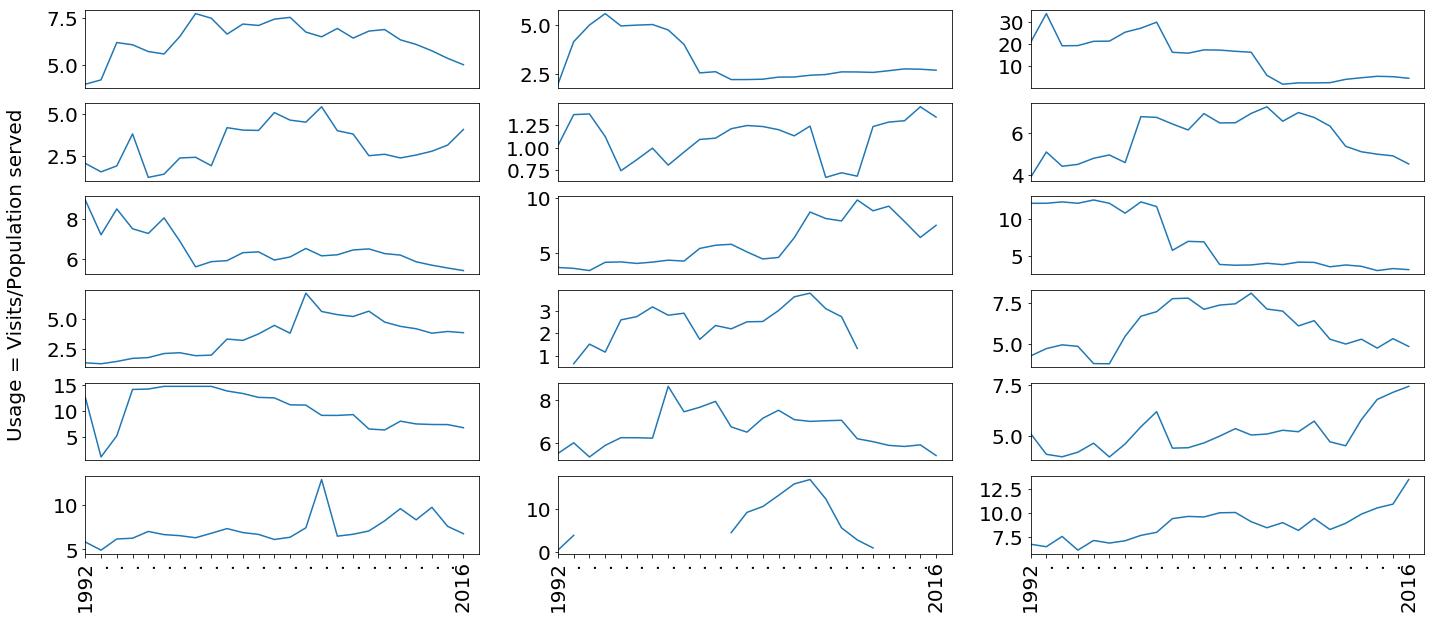

In [466]:
f, axarr = plt.subplots(6, 3, figsize=(24, 10))
plt.rcParams.update({'font.size': 25})

axarr = axarr.ravel()

for i in range(0,18):
    if i == 6:
        x = random.randint(0,UsageDF.shape[0])
        axarr[i].plot(UsageDF.loc[x, :])
        axarr[i].set_xlim([0, 25])
        axarr[i].set_xticklabels([])
        axarr[i].set_xticks([])
        axarr[i].set_ylabel("Usage = Visits/Population served")
        axarr[i].yaxis.set_label_coords(-.15,0)
    elif i < 15:
        x = random.randint(0,UsageDF.shape[0])
        axarr[i].plot(UsageDF.loc[x, :])
        axarr[i].set_xlim([0, 25])
        axarr[i].set_xticklabels([])
        axarr[i].set_xticks([])
    else:
        x = random.randint(0,UsageDF.shape[0])
        axarr[i].plot(UsageDF.loc[x, :])
        axarr[i].set_xlim([0, 25])
        #axarr[i].set_xticklabels(UsageDF.columns, rotation=90)
        axarr[i].set_xticklabels(['1992', '.', '.',   
                                  '.', '.',  '.', '.',  
                                  '.', '.',  '.', '.', 
                                  '.', '.',  '.', '.',
                                  '.', '.',  '.', '.', 
                                  '.', '.',  '.', '.', '.',
                                  '2016'], rotation=90)
plt.show()

In [489]:
#NOW let's plot some resources
mylist_reduceddfs_someavailrel = [LibData_dict['_2003'][['FSCSKEY','BKVOL', 'EBOOK', 'TOTCIR', 'KIDCIRCL']],
LibData_dict['_2004'][['FSCSKEY', 'BKVOL', 'EBOOK', 'TOTCIR', 'KIDCIRCL']],
LibData_dict['_2005'][['FSCSKEY','BKVOL', 'EBOOK', 'TOTCIR', 'KIDCIRCL']],
LibData_dict['_2006'][['FSCSKEY','BKVOL', 'EBOOK', 'TOTCIR', 'KIDCIRCL', 'PITUSR']],
LibData_dict['_2007'][['FSCSKEY','BKVOL', 'EBOOK', 'TOTCIR', 'KIDCIRCL', 'PITUSR']],
LibData_dict['_2008'][['FSCSKEY','BKVOL', 'EBOOK', 'TOTCIR', 'KIDCIRCL', 'PITUSR']],
LibData_dict['_2009'][['FSCSKEY','BKVOL', 'EBOOK', 'TOTCIR', 'KIDCIRCL', 'PITUSR']],
LibData_dict['_2010'][['FSCSKEY','BKVOL', 'EBOOK', 'TOTCIR', 'KIDCIRCL', 'PITUSR']],
LibData_dict['_2011'][['FSCSKEY','BKVOL', 'EBOOK', 'TOTCIR', 'KIDCIRCL', 'PITUSR']],
LibData_dict['_2012'][['FSCSKEY','BKVOL', 'EBOOK', 'TOTCIR', 'KIDCIRCL', 'PITUSR']],
LibData_dict['_2013'][['FSCSKEY','BKVOL', 'EBOOK', 'TOTCIR', 'KIDCIRCL', 'PITUSR']],
LibData_dict['_2014'][['FSCSKEY','BKVOL', 'EBOOK', 'TOTCIR', 'KIDCIRCL', 'PITUSR']],
LibData_dict['_2015'][['FSCSKEY','BKVOL', 'EBOOK', 'TOTCIR', 'KIDCIRCL', 'PITUSR']],
LibData_dict['_2016'][['FSCSKEY','BKVOL', 'EBOOK', 'TOTCIR', 'KIDCIRCL', 'PITUSR']]]

In [495]:
#KIDCIRCULATION
mylist_reduceddfs_kidcirc = [LibData_dict['_1992'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_1993'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_1994'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_1995'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_1996'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_1997'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_1998'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_1999'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_2000'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_2001'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_2002'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_2003'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_2004'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_2005'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_2006'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_2007'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_2008'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_2009'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_2010'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_2011'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_2012'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_2013'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_2014'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_2015'][['FSCSKEY', 'KIDCIRCL']],
LibData_dict['_2016'][['FSCSKEY', 'KIDCIRCL']]]

for i in range(len(mylist_reduceddfs_kidcirc)):
    if i == 0:
        MergedLibData_kidcirc_reduced = mylist_reduceddfs_kidcirc[i]
    else:
        MergedLibData_kidcirc_reduced = pd.merge(
            MergedLibData_kidcirc_reduced,
            mylist_reduceddfs_kidcirc[i],
            how = 'outer',
            on = 'FSCSKEY'
        )

In [493]:
#NOW let's plot some resources
mylist_reduceddfs_internetusr = [LibData_dict['_2006'][['FSCSKEY','PITUSR']],
LibData_dict['_2007'][['FSCSKEY','PITUSR']],
LibData_dict['_2008'][['FSCSKEY', 'PITUSR']],
LibData_dict['_2009'][['FSCSKEY','PITUSR']],
LibData_dict['_2010'][['FSCSKEY','PITUSR']],
LibData_dict['_2011'][['FSCSKEY','PITUSR']],
LibData_dict['_2012'][['FSCSKEY', 'PITUSR']],
LibData_dict['_2013'][['FSCSKEY', 'PITUSR']],
LibData_dict['_2014'][['FSCSKEY', 'PITUSR']],
LibData_dict['_2015'][['FSCSKEY', 'PITUSR']],
LibData_dict['_2016'][['FSCSKEY', 'PITUSR']]]

for i in range(len(mylist_reduceddfs_internetusr)):
    if i == 0:
        MergedLibData_internetusr_reduced = mylist_reduceddfs_internetusr[i]
    else:
        MergedLibData_internetusr_reduced = pd.merge(
            MergedLibData_internetusr_reduced,
            mylist_reduceddfs_internetusr[i],
            how = 'outer',
            on = 'FSCSKEY'
        )

In [501]:
MergedLibData_kidcirc_reduced.columns = ['FSCSKEY', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', 
                  '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [502]:
MergedLibData_internetusr_reduced.columns = ['FSCSKEY', '2006', '2007', '2008', '2009',
                  '2010', '2011', '2012', '2013', '2014', '2015', '2016']

,FSCSKEY,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,AK0001,2642.0,2764.0,1133.0,1789.0,1838.0,1591.0,2685.0,3370.0,1596.0,...,1653.0,1336.0,1311.0,1188.0,1273.0,1344.0,1085.0,1144.0,2169.0,3705.0
1,AK0002,488566.0,485055.0,487568.0,475672.0,487535.0,449079.0,480644.0,475197.0,470562.0,...,450565.0,445026.0,613097.0,562279.0,654284.0,650437.0,658002.0,484429.0,475424.0,531712.0
2,AK0003,1186.0,1076.0,1446.0,1309.0,1854.0,2353.0,2138.0,1362.0,1376.0,...,2848.0,707.0,577.0,80.0,355.0,205.0,320.0,501.0,101.0,0.0
3,AK0004,1655.0,756.0,137.0,335.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AK0006,5315.0,5972.0,0.0,6327.0,6493.0,6359.0,5368.0,4420.0,4796.0,...,2320.0,2146.0,2531.0,2605.0,1809.0,2359.0,1650.0,1873.0,1863.0,2757.0
5,AK0007,18064.0,20699.0,17125.0,12627.0,12094.0,7287.0,7829.0,8746.0,9721.0,...,23972.0,22069.0,22438.0,21671.0,23377.0,21820.0,21047.0,18330.0,19232.0,17572.0
6,AK0008,995.0,11251.0,1452.0,1262.0,976.0,1550.0,1525.0,2025.0,2025.0,...,2200.0,2095.0,2005.0,2200.0,2385.0,2550.0,2665.0,2755.0,2365.0,1375.0
7,AK0011,2350.0,2740.0,2725.0,3220.0,2905.0,2650.0,2819.0,2819.0,2395.0,...,160.0,101.0,45.0,31.0,89.0,150.0,360.0,590.0,42.0,106.0
8,AK0013,1320.0,1408.0,1512.0,1621.0,1567.0,1600.0,1345.0,1283.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AK0014,949.0,1458.0,969.0,2764.0,529.0,680.0,672.0,794.0,286.0,...,550.0,597.0,796.0,881.0,1177.0,1355.0,970.0,816.0,162.0,228.0


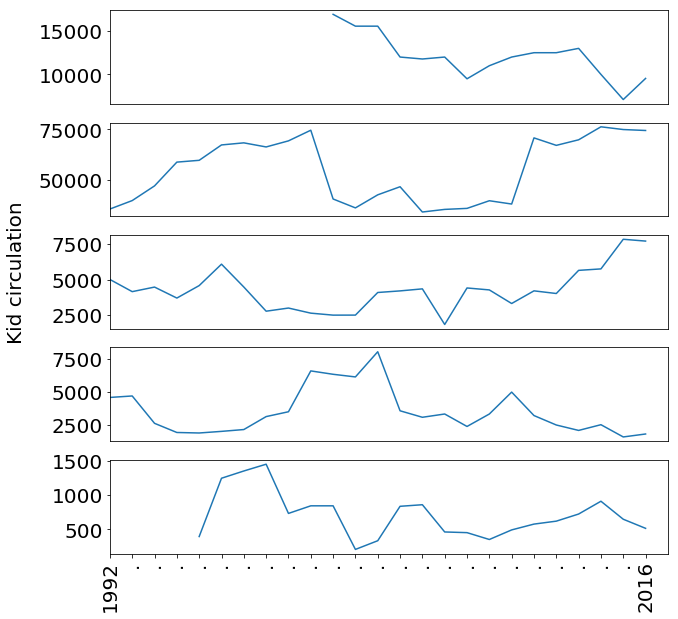

In [522]:
f, axarr = plt.subplots(5, 1, figsize=(10, 10))
plt.rcParams.update({'font.size': 20})

axarr = axarr.ravel()

for i in range(0,5):
    if i == 4:
        x = random.randint(0,MergedLibData_kidcirc_reduced.shape[0])
        axarr[i].plot(MergedLibData_kidcirc_reduced.iloc[x, 1:])
        axarr[i].set_xlim([0, 25])
        axarr[i].set_xticklabels(['1992', '.', '.',   
                                  '.', '.',  '.', '.',  
                                  '.', '.',  '.', '.', 
                                  '.', '.',  '.', '.',
                                  '.', '.',  '.', '.', 
                                  '.', '.',  '.', '.', '.',
                                  '2016'], rotation=90)
        axarr[i].set_ylabel("Kid circulation")
        axarr[i].yaxis.set_label_coords(-.15,3)
    else: 
        x = random.randint(0,MergedLibData_kidcirc_reduced.shape[0])
        axarr[i].plot(MergedLibData_kidcirc_reduced.iloc[x, 1:])
        axarr[i].set_xlim([0, 25])
        axarr[i].set_xticklabels([])
        axarr[i].set_xticks([])
        
plt.show()

In [520]:
MergedLibData_kidcirc_reduced.iloc[3, 2 :]

1993    756
1994    137
1995    335
1996    NaN
1997    NaN
1998    NaN
1999    NaN
2000    NaN
2001    NaN
2002    NaN
2003    NaN
2004    NaN
2005    NaN
2006    NaN
2007    NaN
2008    NaN
2009    NaN
2010    NaN
2011    NaN
2012    NaN
2013    NaN
2014    NaN
2015    NaN
2016    NaN
Name: 3, dtype: object